# Problem and Objective

In [2]:
#from google.colab import drive
#drive.mount('/content/drive')

**Project Overview**
The study will explore the Global Health Observatory dataset to examine how a range of economic and health-related indicators shape life expectancy around the world.

Because no target labels are supplied, we will treat this as an unsupervised classification problem, experimenting with several clustering algorithms to see which ones best organize the data. Our working hypothesis is that nations displaying comparable indicator profiles will naturally fall into the same clusters.

**Aim**
Our main aim is to reveal hidden structures—patterns, groupings, and interconnections—within the variables, shedding light on the key drivers of life expectancy.

# Import Libraries and Load Data

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report
from sklearn.neighbors import KNeighborsClassifier
from xgboost import  XGBClassifier
%matplotlib inline
from sklearn.svm import SVC

**Load Data**

In [4]:
file_path = '/content/drive/MyDrive/5510/life_expectancy_data.csv'
data = pd.read_csv(file_path)


# Data - Source and Description

**Source**

This is public dataset from Kaggle:
https://www.kaggle.com/code/ahmedabbas757/life-expectancy-prediction

The data contains various attributes of what affects life expectancey in each country. The data was collected from WHO and United Nations website with the help of Deeksha Russell and Duan Wang.The detailed data dictionary is given below.

**Data Dictionary**

* **Country**:  Name of the country.

* **Year**: The year for which the data is recorded.

* **Life Expectancy**: Average number of years a person is expected to live in the country.

* **Adult Mortality**: Adult mortality rate (probability of dying between 15 and 60 years per 1000 population).

* **Infant Deaths**:  Number of infant deaths per 1000 population.

* **Alcohol**: Recorded per capita (15+) consumption (in liters of pure alcohol).

* **Percentage Expenditure**: Expenditure on health as a percentage of Gross Domestic Product per capita (%).

* **Hepatitis B**: Hepatitis B immunization coverage among 1-year-olds (%).

* **Measles**: Number of reported measles cases per 1000 population.

* **BMI**:  Average Body Mass Index of the population.

* **Under-five Deaths**:

* **Polio**: Polio (Pol3) immunization coverage among 1-year-olds (%).

* **Total Expenditure**: General government expenditure on health as a percentage of total government expenditure (%).

* **Diphtheria**: Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%).

* **HIV/AIDS**: Deaths per 1,000 live births HIV/AIDS (0-4 years).

* **GDP**: Gross Domestic Product per capita (in USD).

* **Population**: Population of the country.

* **Thinness 1-19 years**: Prevalence of thinness among children and adolescents for Age 1 to 19 (% ).

* **Thinness 5-9 years**: Prevalence of thinness among children for Age 5 to 9(%).

* **Income Composition of Resources**: Human Development Index in terms of income composition of resources (index ranging from 0 to 1).

* **Schooling**: Number of years of schooling.


**Size**

In [5]:
data.shape

(2938, 22)

We have 2938 rows with 22 attributes

# Basic Data Analysis

**Basic Data Information**

Let us look at explore some rows to see what we have in data.

In [6]:
data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


Let us look at statisctics for data values

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,2938.0,2.007519e+03,4.613841e+00,2000.00000,2004.000000,2.008000e+03,2.012000e+03,2.015000e+03
Life expectancy,2928.0,6.922493e+01,9.523867e+00,36.30000,63.100000,7.210000e+01,7.570000e+01,8.900000e+01
Adult Mortality,2928.0,1.647964e+02,1.242921e+02,1.00000,74.000000,1.440000e+02,2.280000e+02,7.230000e+02
infant deaths,2938.0,3.030395e+01,1.179265e+02,0.00000,0.000000,3.000000e+00,2.200000e+01,1.800000e+03
Alcohol,2744.0,4.602861e+00,4.052413e+00,0.01000,0.877500,3.755000e+00,7.702500e+00,1.787000e+01
percentage expenditure,2938.0,7.382513e+02,1.987915e+03,0.00000,4.685343,6.491291e+01,4.415341e+02,1.947991e+04
Hepatitis B,2385.0,8.094046e+01,2.507002e+01,1.00000,77.000000,9.200000e+01,9.700000e+01,9.900000e+01
Measles,2938.0,2.419592e+03,1.146727e+04,0.00000,0.000000,1.700000e+01,3.602500e+02,2.121830e+05
BMI,2904.0,3.832125e+01,2.004403e+01,1.00000,19.300000,4.350000e+01,5.620000e+01,8.730000e+01
under-five deaths,2938.0,4.203574e+01,1.604455e+02,0.00000,0.000000,4.000000e+00,2.800000e+01,2.500000e+03


**Observations**

* Not every column is complete: for instance Alcohol (2 744 observations) and Hepatitis B (2 385) have noticeably more missing entries than Year or Life expectancy (2 928+).

* Average life expectancy is ≈ 69 years with an inter-quartile range of roughly 63 – 76 years, but the minimum drops to 36 years, showing a wide disparity across countries.

## Missing values, Data Cleanup and Understanding Data

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

The dataset has **2938 rows and 22 columns**.


**Observations based on above analysis:**

*   Country and Status are of object type while rest columns are numeric in nature.
*   We have some missing values
*   Some column names have leading or trailing spaces



**Fix column names**

Let us start by fixing column names as spaces can cause issues/confusions

In [9]:
columns=data.columns.to_list()
columns

['Country',
 'Year',
 'Status',
 'Life expectancy ',
 'Adult Mortality',
 'infant deaths',
 'Alcohol',
 'percentage expenditure',
 'Hepatitis B',
 'Measles ',
 ' BMI ',
 'under-five deaths ',
 'Polio',
 'Total expenditure',
 'Diphtheria ',
 ' HIV/AIDS',
 'GDP',
 'Population',
 ' thinness  1-19 years',
 ' thinness 5-9 years',
 'Income composition of resources',
 'Schooling']

In [10]:
columns[3]="Life expectancy"
columns[9]="Measles"
columns[10]="BMI"
columns[11]="Under-5 Deaths"
columns[14]="Diphtheria"
columns[15]="HIV/AIDS"
columns[18]="thinness 1-19 years"
columns[19]="thinness 5-9 years"
data.columns=columns
fixed_columns=data.columns.to_list()
fixed_columns

['Country',
 'Year',
 'Status',
 'Life expectancy',
 'Adult Mortality',
 'infant deaths',
 'Alcohol',
 'percentage expenditure',
 'Hepatitis B',
 'Measles',
 'BMI',
 'Under-5 Deaths',
 'Polio',
 'Total expenditure',
 'Diphtheria',
 'HIV/AIDS',
 'GDP',
 'Population',
 'thinness 1-19 years',
 'thinness 5-9 years',
 'Income composition of resources',
 'Schooling']

**Missing Data and Data Imputing**


In [11]:
data.isnull().sum()

,0
Country,0
Year,0
Status,0
Life expectancy,10
Adult Mortality,10
infant deaths,0
Alcohol,194
percentage expenditure,0
Hepatitis B,553
Measles,0


In [12]:
countries_with_missing_values = data['Country'].unique()
print(len(countries_with_missing_values))

193


**Key observations**

Missingness is widespread, not country-specific
There are 193 distinct countries in the file—the exact number returned by data['Country'].unique().
Every country is missing something, so eliminating entire countries would erase the whole dataset. We must therefore impute before dropping rows wholesale.

Only a few columns are badly affected
Four variables (Population, Hepatitis B, GDP, Total expenditure) account for most of the loss. All other columns suffer ≤ 7 % missingness, which is comparatively easy to handle.

We have to be careful here for imputing data. As we know, range of factors would vary widely from smallest to largest countries, we would first try to handle missing data by taking mean of data for that given country (if available)

In [13]:
# Identify countries with missing values before imputation
countries_with_missing_values = data[data.isna().any(axis=1)]['Country'].unique()
print(countries_with_missing_values)
print(len(countries_with_missing_values))

# Impute missing values
for column in data.columns:
    if data[column].isna().any():
        # Replace NaNs with the mean value for that country
        data[column] = data.groupby('Country')[column].transform(lambda x: x.fillna(x.mean()))

# countries_with_missing_values now contains the list of countries that had missing values

countries_with_missing_values = data[data.isna().any(axis=1)]['Country'].unique()
print(countries_with_missing_values)
print(len(countries_with_missing_values))

['Algeria' 'Angola' 'Antigua and Barbuda' 'Argentina' 'Armenia'
 'Australia' 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh'
 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin' 'Bhutan'
 'Bolivia (Plurinational State of)' 'Bosnia and Herzegovina' 'Botswana'
 'Brazil' 'Brunei Darussalam' 'Bulgaria' 'Burkina Faso' 'Burundi'
 "Côte d'Ivoire" 'Cabo Verde' 'Cambodia' 'Cameroon' 'Canada'
 'Central African Republic' 'Chad' 'Chile' 'China' 'Colombia' 'Comoros'
 'Congo' 'Cook Islands' 'Costa Rica' 'Croatia' 'Cuba' 'Cyprus' 'Czechia'
 "Democratic People's Republic of Korea"
 'Democratic Republic of the Congo' 'Denmark' 'Djibouti' 'Dominica'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea'
 'Eritrea' 'Estonia' 'Ethiopia' 'Fiji' 'Finland' 'France' 'Gabon' 'Gambia'
 'Georgia' 'Germany' 'Ghana' 'Greece' 'Grenada' 'Guatemala' 'Guinea'
 'Guinea-Bissau' 'Guyana' 'Haiti' 'Honduras' 'Hungary' 'Iceland' 'India'
 'Indonesia' 'Iran (Islamic Republic of)' 'Iraq' 'Ireland' 'Israe

In [14]:
data.isnull().sum()

,0
Country,0
Year,0
Status,0
Life expectancy,10
Adult Mortality,10
infant deaths,0
Alcohol,17
percentage expenditure,0
Hepatitis B,144
Measles,0


**Handling the remaining gaps**

Even after our initial cleanup, 60 of the 191 nations—over 600 of the ~2 900 records—still contain blanks. That is generally too much information to discard outright.

A better long-term fix would be to fill the holes with external datasets: GDP and population figures, for example, are widely available and could be merged in without trouble.

However, to keep this exercise focused, we'll eliminate the rows that still have missing values. Doing so leaves us with data for roughly 120 countries, which is more than sufficient for the analyses we plan to run.

In [15]:
data_fixed = data.dropna()
print('fixed data shape:',data_fixed.shape  )
print('original data shape:',data.shape  )
data_fixed.isnull().sum()

fixed data shape: (2128, 22)
original data shape: (2938, 22)


,0
Country,0
Year,0
Status,0
Life expectancy,0
Adult Mortality,0
infant deaths,0
Alcohol,0
percentage expenditure,0
Hepatitis B,0
Measles,0


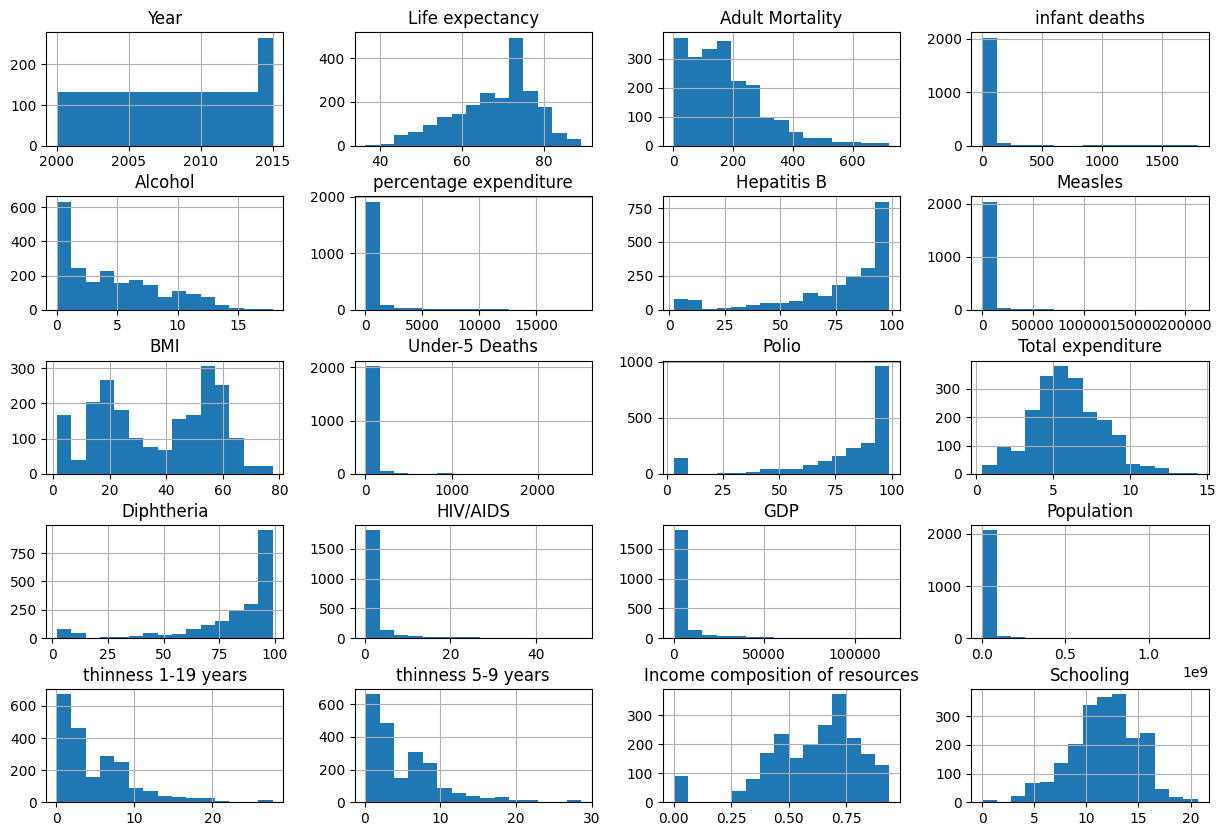

In [16]:
import matplotlib.pyplot as plt

# 1) Draw the histograms (returns a numpy array of Axes)
axes = data_fixed.hist(bins=15, figsize=(15, 10))

plt.subplots_adjust(hspace=0.45,wspace=0.3)
plt.show()


**Quick take-aways from the histograms**

Pronounced right-skew in several variables - GDP, Population, Measles cases, Infant/Under-5 deaths and Percentage expenditure all pile up near zero with a long tail of extreme values. Most countries lie at the low end while a handful drive the very large maxima.

Immunisation indicators are mostly high but bimodal - Hepatitis B, Polio and Diphtheria coverage cluster around 90-100 %, yet a visible secondary mass sits below 40 %. This split suggests a subset of countries with chronically low vaccination rates.

**Coorrelation Analysis**

Let us see if some feature correlations are in line with our original assumptions

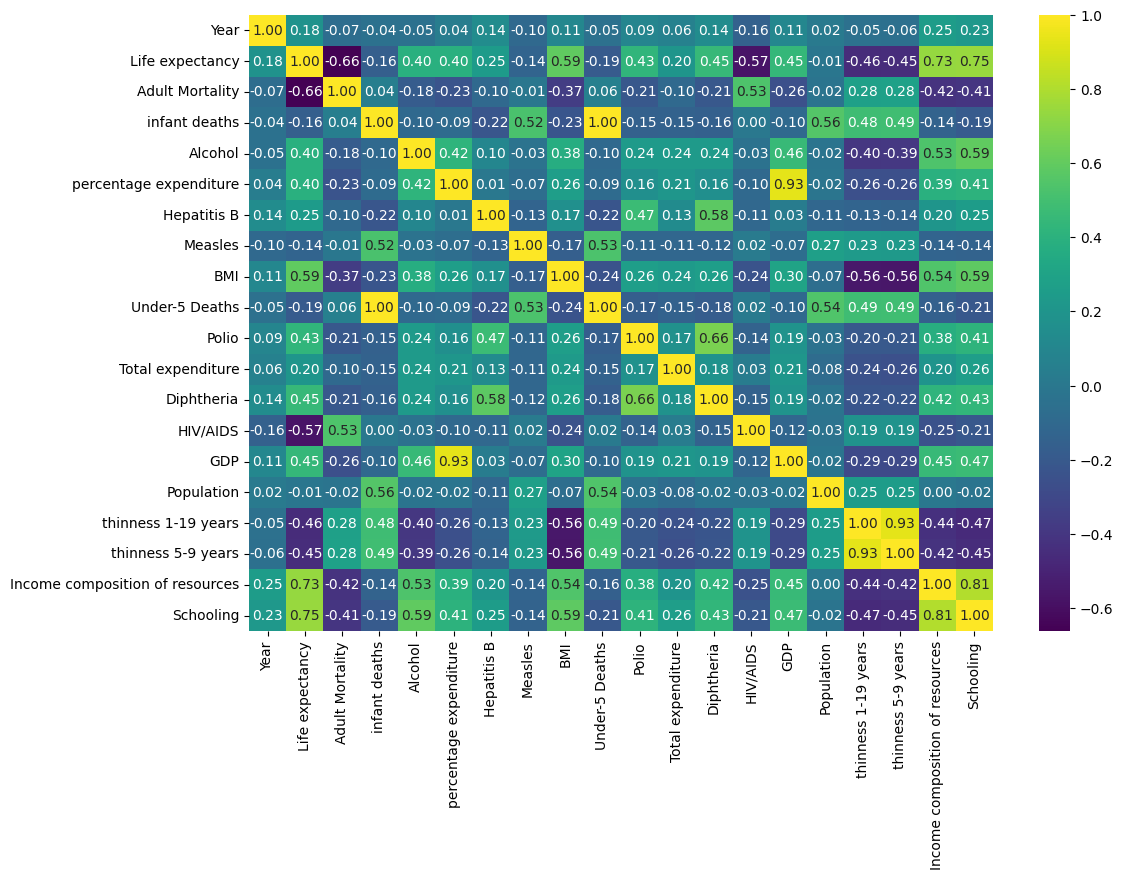

In [17]:
# keep only numeric columns for the correlation matrix
corr_matrix = data_fixed.select_dtypes(include='number').corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix,
            annot=True,
            fmt=".2f",
            cmap='viridis')
plt.show()

**Observations**

Income spent on health and schooling seems to have postive correlation to life expectancy and HIV/Aids and malnutrition seems to have negative correlation.

**Let us see how trend is for life expectancy in general**

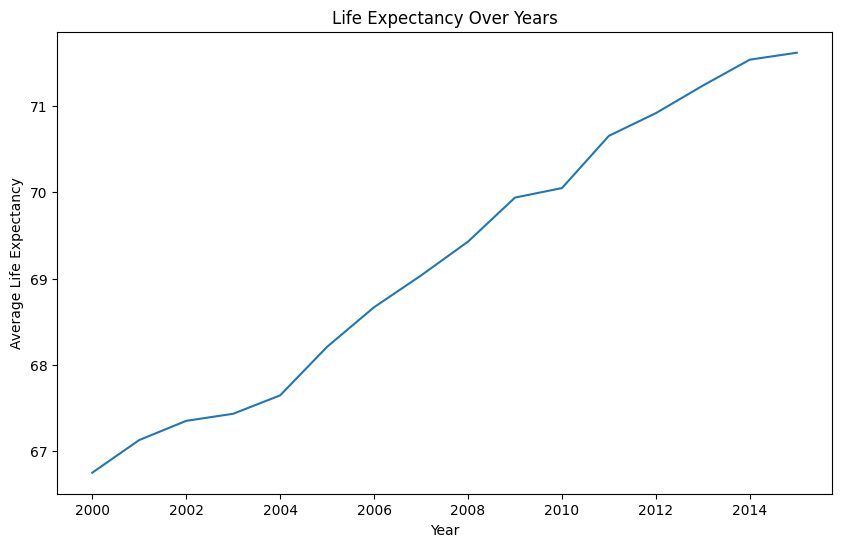

In [18]:
# Trend Analysis
plt.figure(figsize=(10, 6))
data.groupby('Year')['Life expectancy'].mean().plot(kind='line')
plt.ylabel('Average Life Expectancy')
plt.title('Life Expectancy Over Years')
plt.show()

**Observations from the global-average curve (2000 - 2015)**

Steady upward trajectory - Mean life expectancy rises almost every year, with no visible reversals, indicating broad and persistent health gains worldwide.

~4½-year improvement in 15 years - The average climbs from just under 67 years in 2000 to a little over 71 years by 2015, an increase of roughly 0.3 years per calendar year.

Life expectancy
Skew : -0.64


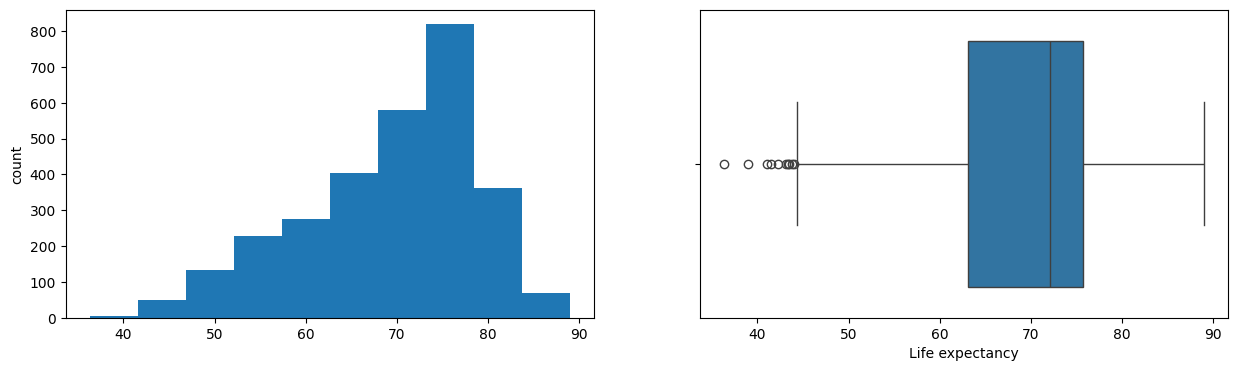

GDP
Skew : 3.24


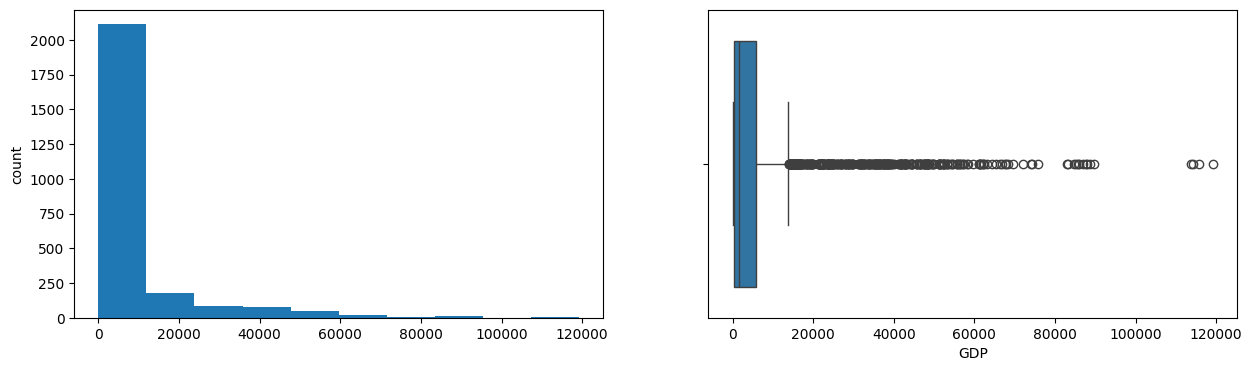

Income composition of resources
Skew : -1.14


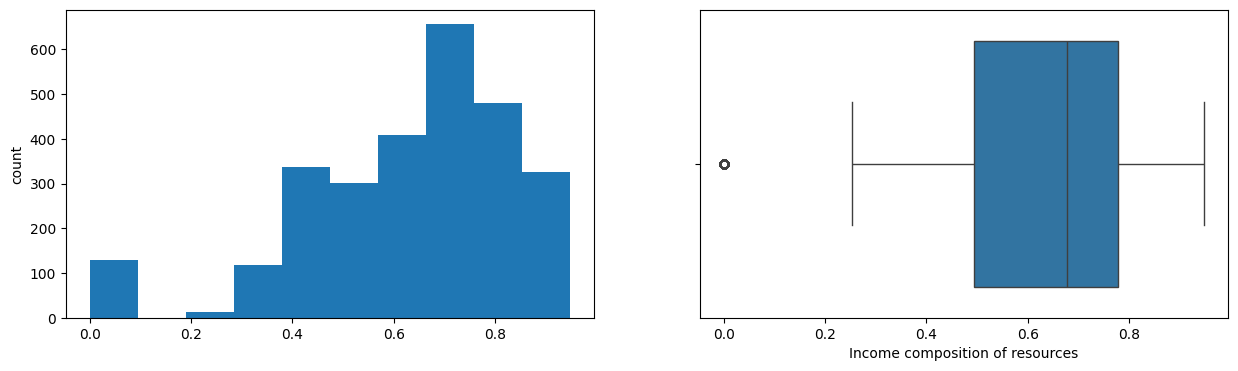

Total expenditure
Skew : 0.63


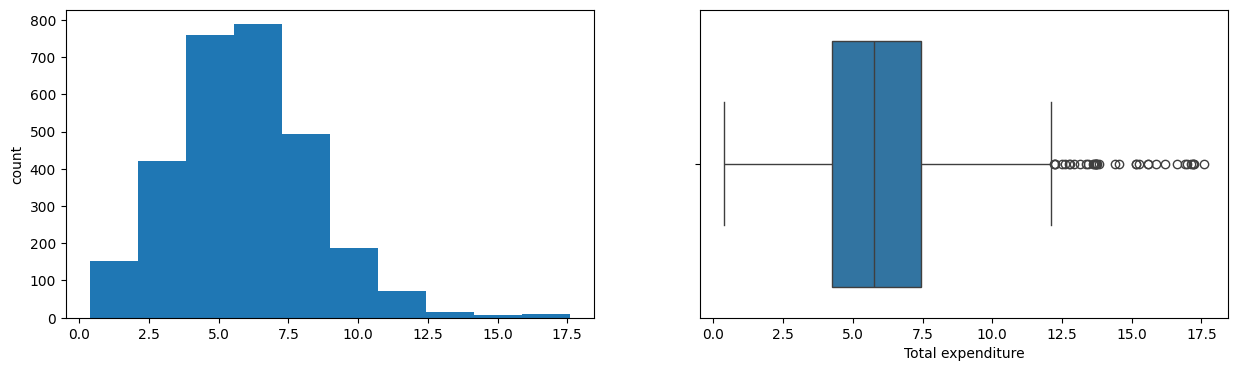

Schooling
Skew : -0.6


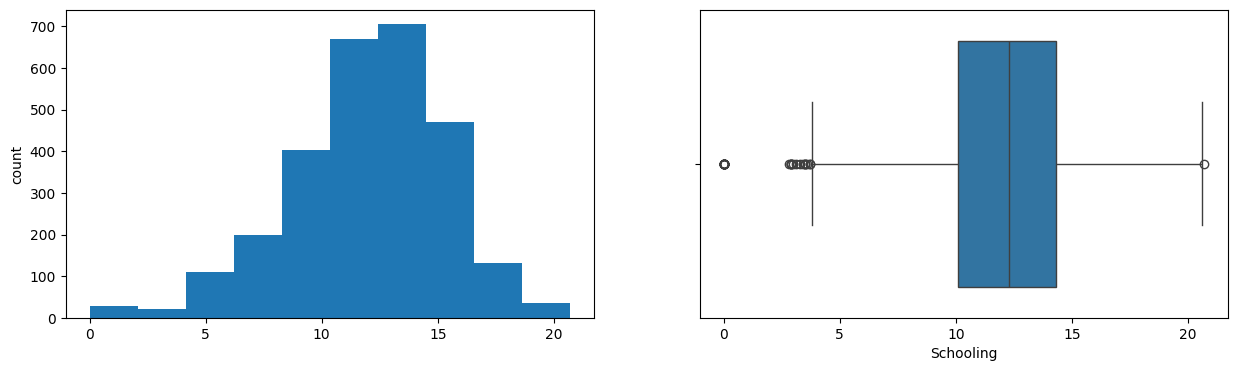

infant deaths
Skew : 9.79


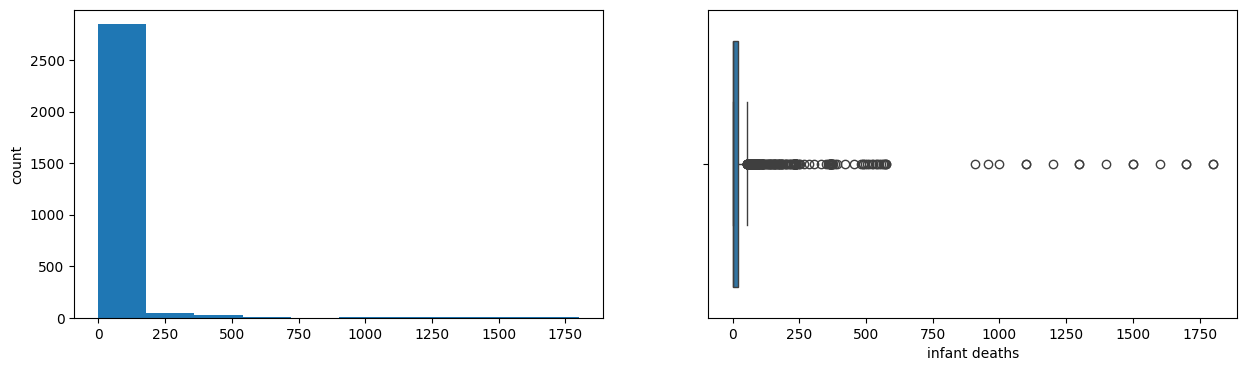

In [19]:
for col in ['Life expectancy', 'GDP', 'Income composition of resources', 'Total expenditure','Schooling','infant deaths']:
    print(col)
    print('Skew :',round(data[col].skew(),2))
    plt.figure(figsize=(15,4))
    plt.subplot(1,2,1)
    data[col].hist(bins=10, grid=False)
    plt.ylabel('count')
    plt.subplot(1,2,2)
    sns.boxplot(x=data[col])
    plt.show()

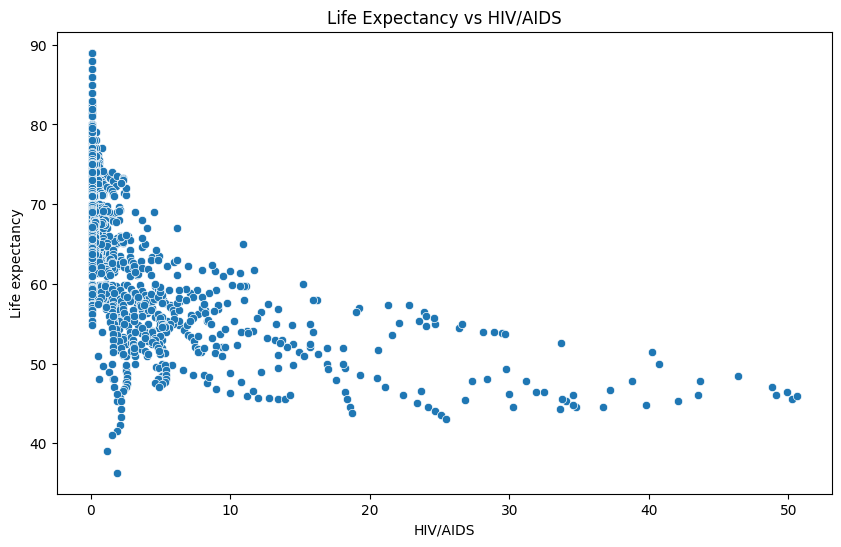

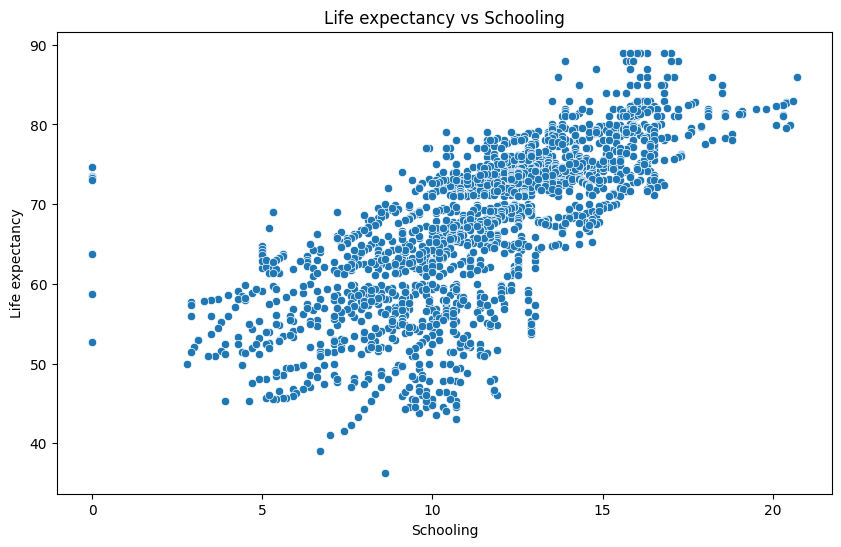

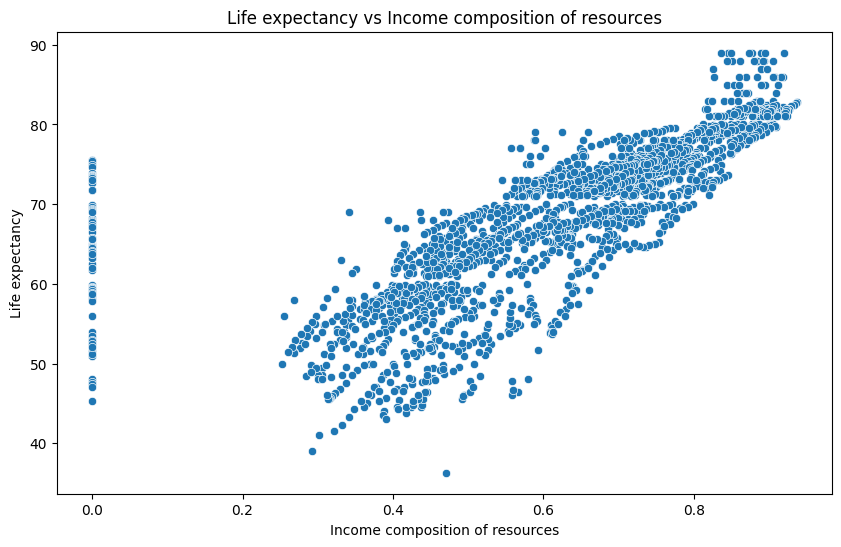

In [20]:
# Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='HIV/AIDS', y='Life expectancy', data=data_fixed)
plt.title('Life Expectancy vs HIV/AIDS')
plt.show()


plt.figure(figsize=(10, 6))
sns.scatterplot(x='Schooling', y='Life expectancy', data=data_fixed)
plt.title('Life expectancy vs Schooling')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Income composition of resources', y='Life expectancy', data=data_fixed)
plt.title('Life expectancy vs Income composition of resources')
plt.show()



# Building Models

We would try following models for this classification task:


*   K-Means
*   DBSCAN
*   Gaussian

We would try following steps for these models:


*   Train model
*   Look at feature importance and best params
*   Plot generated clusters
*   Analyze generated clusters to see if they make sense based on our requirement


## Scale features, do PCA

In [21]:
data_fixed = data_fixed.drop(['Year'], axis=1)

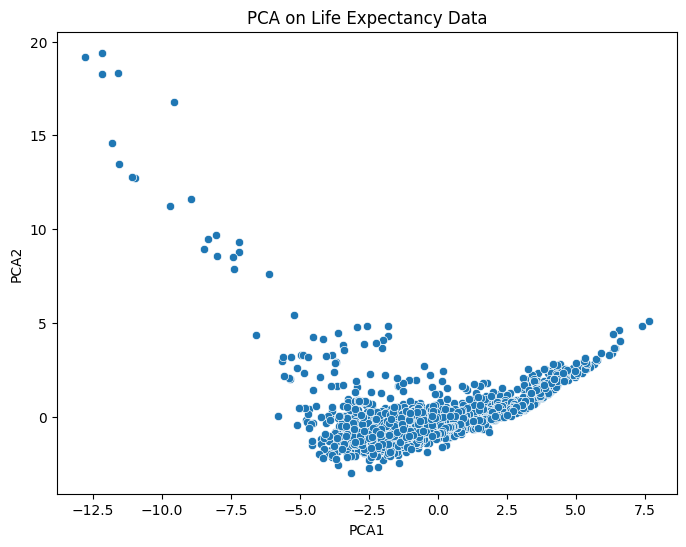

In [22]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


data_fixed_features = data_fixed.drop(['Life expectancy'], axis=1)

numerical_features = data_fixed_features.select_dtypes(include=['float64', 'int64'])

# Scaling the features to have a mean of 0 and unit
scaler = StandardScaler()
scaled_features = scaler.fit_transform(numerical_features)

# Apply PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_features)


# Create a DataFrame with the PCA results
data_pca = pd.DataFrame(data = pca_result, columns = ['PCA1', 'PCA2'])

# Create a DataFrame with the PCA results
data_fixed.reset_index(drop=True, inplace=True)
data_pca.reset_index(drop=True, inplace=True)
data_with_pca = pd.concat([data_fixed, data_pca], axis=1)

# Visualize PCA result
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PCA1', y='PCA2', data=data_pca)
plt.title('PCA on Life Expectancy Data')
plt.show()

In [23]:
# Feature Importance - Which features contribute the most to the components
def pca_feature_importance(pca, features):
    importance_df = pd.DataFrame(pca.components_, columns=features.columns, index=['PCA1', 'PCA2'])
    return importance_df.T

importance_df = pca_feature_importance(pca, numerical_features)
print(importance_df)


                                     PCA1      PCA2
Adult Mortality                 -0.196837 -0.192207
infant deaths                   -0.224169  0.468669
Alcohol                          0.251310  0.179780
percentage expenditure           0.222287  0.221480
Hepatitis B                      0.155502 -0.045506
Measles                         -0.145350  0.312768
BMI                              0.290453  0.069484
Under-5 Deaths                  -0.229401  0.462035
Polio                            0.213585  0.080368
Total expenditure                0.158051  0.008123
Diphtheria                       0.223601  0.082065
HIV/AIDS                        -0.124174 -0.135280
GDP                              0.242998  0.231022
Population                      -0.111115  0.381392
thinness 1-19 years             -0.317331  0.130164
thinness 5-9 years              -0.316193  0.133812
Income composition of resources  0.312889  0.208778
Schooling                        0.331894  0.187094


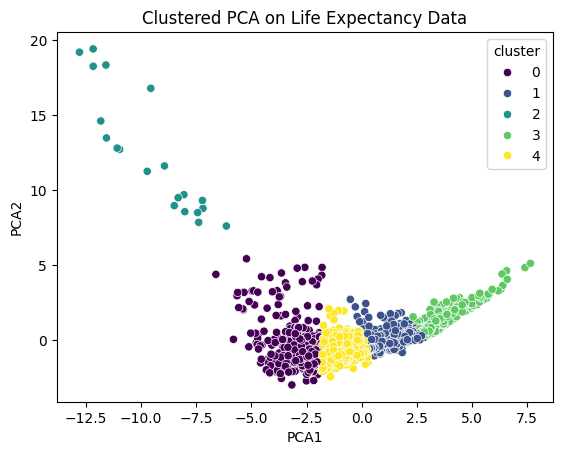

Number of outliers detected: 590


In [24]:
from sklearn.cluster import KMeans
from scipy.stats import zscore

# Clustering Analysis using KMeans
kmeans = KMeans(n_clusters=5)
data_pca['cluster'] = kmeans.fit_predict(pca_result)

# Visualize the clustering
sns.scatterplot(x='PCA1', y='PCA2', hue='cluster', data=data_pca, palette='viridis')
plt.title('Clustered PCA on Life Expectancy Data')
plt.show()

# Anomaly Detection using Z-score
# Calculating the absolute Z-score for each observation
z_scores = np.abs(zscore(scaled_features))

# Define a threshold for identifying outliers
threshold = 3

# Find rows where any column has a Z-score greater than the threshold
outliers = np.where(z_scores > threshold)

# Outlier DataFrame
outlier_data = data_fixed.iloc[outliers[0]]

print(f"Number of outliers detected: {outlier_data.shape[0]}")

## KNN

Silhouette Score for 5 clusters: 0.206


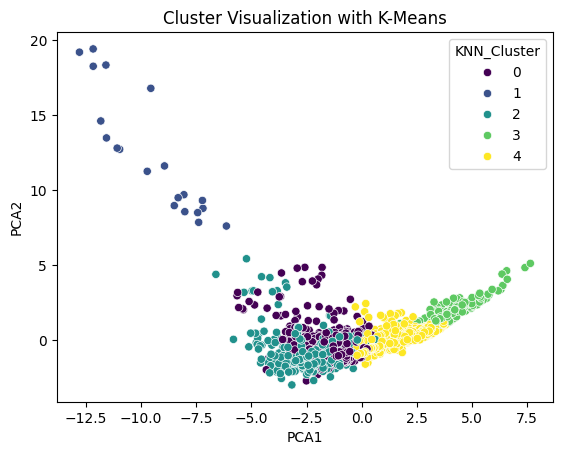

In [25]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# Choosing the number of clusters with KMeans
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)

# Fitting the KMeans model
clusters = kmeans.fit_predict(scaled_features)

# Adding the cluster IDs to the original data
data_with_pca['KNN_Cluster'] = clusters

# Calculating the silhouette score
silhouette_avg = silhouette_score(scaled_features, clusters)
print(f'Silhouette Score for {k} clusters: {silhouette_avg:.3f}')

# Visualizing the clusters (if you have PCA applied, you can plot the first two principal components)
# If you don't have PCA components, replace 'PCA1' and 'PCA2' with your chosen features
sns.scatterplot(x='PCA1', y='PCA2', hue='KNN_Cluster', data=data_with_pca, palette='viridis')
plt.title('Cluster Visualization with K-Means')
plt.show()

**Let us find optimal number of clusters**

In [26]:
from sklearn.metrics import silhouette_score

# Calculating the silhouette score using the scaled features and the cluster labels
silhouette_avg = silhouette_score(scaled_features, clusters)
print(f'Silhouette Score for {k} clusters: {silhouette_avg:.3f}')

# You might want to calculate the silhouette score for different values of k to determine the optimal number of clusters
for n_clusters in range(2, 10):  # Example range from 2 to 9 clusters
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    clusters = kmeans.fit_predict(scaled_features)
    silhouette_avg = silhouette_score(scaled_features, clusters)
    print(f'Silhouette Score for {n_clusters} clusters: {silhouette_avg:.3f}')


Silhouette Score for 5 clusters: 0.206
Silhouette Score for 2 clusters: 0.712
Silhouette Score for 3 clusters: 0.243
Silhouette Score for 4 clusters: 0.241
Silhouette Score for 5 clusters: 0.206
Silhouette Score for 6 clusters: 0.148
Silhouette Score for 7 clusters: 0.151
Silhouette Score for 8 clusters: 0.161
Silhouette Score for 9 clusters: 0.163


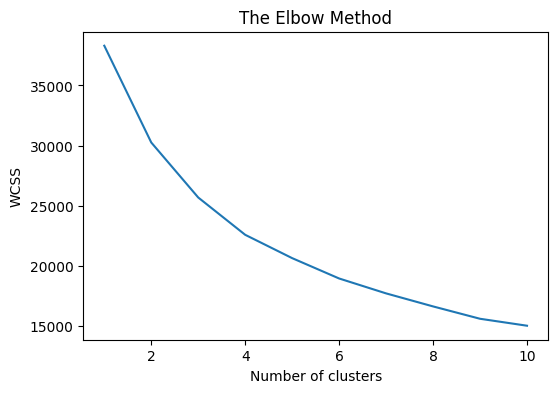

In [27]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []  # Within-cluster sum of squares

# Try different numbers of clusters
for i in range(1, 11):  # Let's try from 1 to 10 clusters
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

# Plotting the results onto a line graph to observe 'The Elbow'
plt.figure(figsize=(6, 4))
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')  # Within-cluster sum of squares
plt.show()


For n_clusters=4, the silhouette score is: 0.241


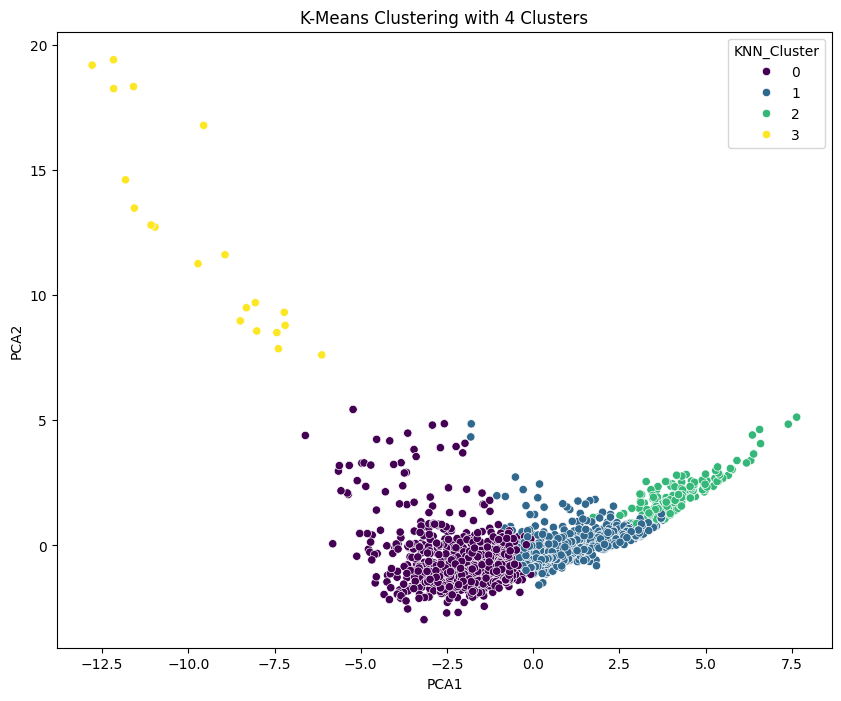

In [28]:
from sklearn.metrics import silhouette_score

# Run K-Means with the optimal number of clusters (e.g., 4)
optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
cluster_labels = kmeans.fit_predict(scaled_features)

# Calculate silhouette score for the optimal number of clusters
silhouette_avg = silhouette_score(scaled_features, cluster_labels)
print(f'For n_clusters={optimal_clusters}, the silhouette score is: {silhouette_avg:.3f}')

# Plotting the clusters
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_features)
data_with_pca['PCA1'] = pca_result[:, 0]
data_with_pca['PCA2'] = pca_result[:, 1]
data_with_pca['KNN_Cluster'] = cluster_labels

# Plot the clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PCA1', y='PCA2', hue='KNN_Cluster', data=data_with_pca, palette='viridis')
plt.title(f'K-Means Clustering with {optimal_clusters} Clusters')
plt.show()


             Life expectancy  Adult Mortality  infant deaths    Alcohol  \
KNN_Cluster                                                               
0                  60.032159       249.859031      47.648678   2.377150   
1                  73.432197       125.308712       8.379735   5.437888   
2                  81.313889        64.097222       1.020833  10.218782   
3                  61.925000       124.150000    1207.000000   3.467100   

             percentage expenditure  Hepatitis B       Measles        BMI  \
KNN_Cluster                                                                 
0                        102.934719    67.477679   3396.966960  22.109251   
1                        400.130645    86.880569   1054.491477  47.316288   
2                       5871.275994    74.393091    564.993056  53.686111   
3                         30.340323    35.336364  68787.100000  15.425000   

             Under-5 Deaths      Polio  ...  HIV/AIDS           GDP  \
KNN_Cluster    

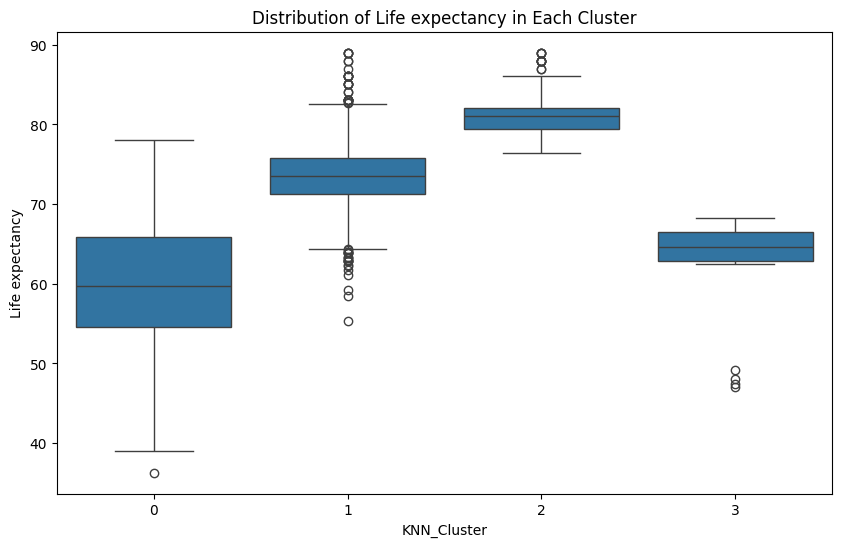

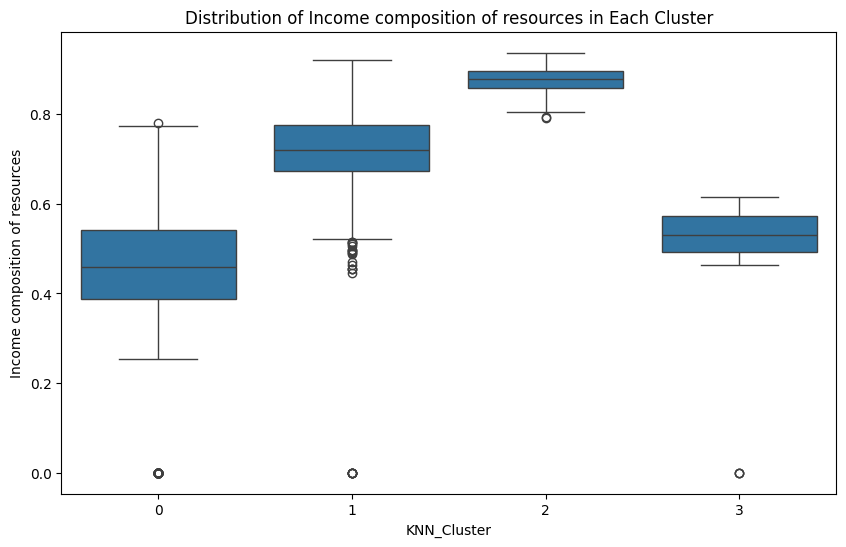

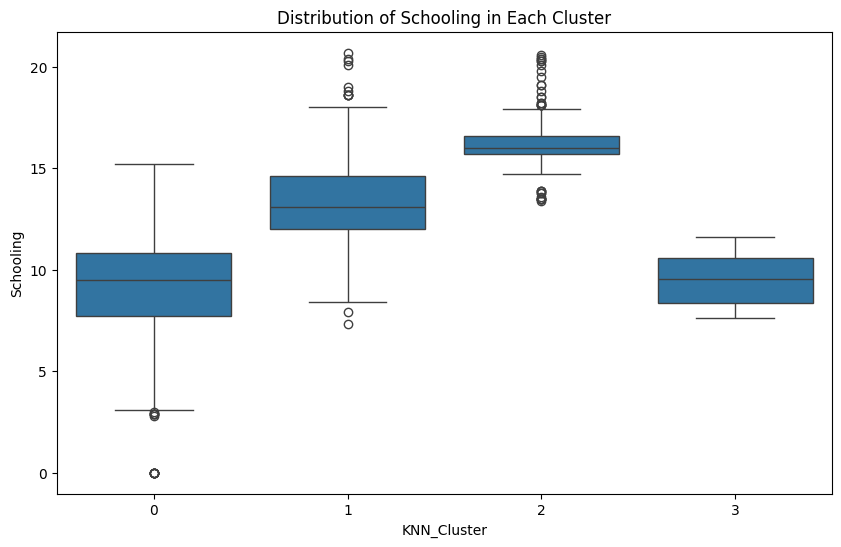

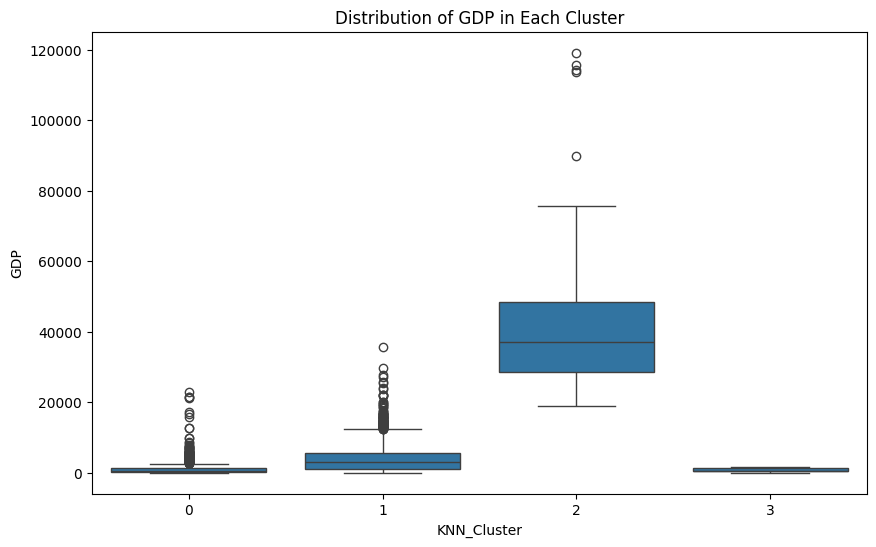

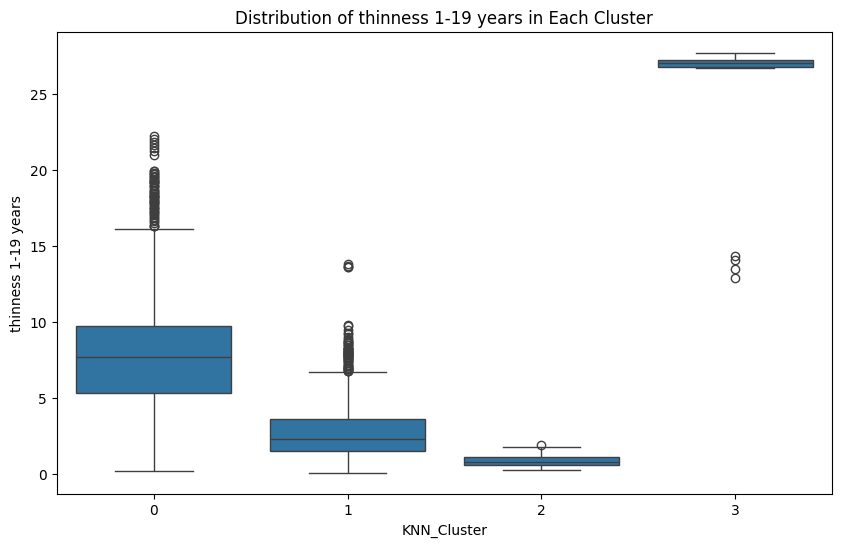

In [29]:
# Profile each cluster
numeric_cols = data_with_pca.select_dtypes(include=[np.number]).columns
cluster_profiles = data_with_pca.groupby('KNN_Cluster')[numeric_cols].mean()

print(cluster_profiles)

# Visualize cluster characteristics
for col in ['Life expectancy','Income composition of resources','Schooling','GDP','thinness 1-19 years']:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='KNN_Cluster', y=col, data=data_with_pca)
    plt.title(f'Distribution of {col} in Each Cluster')
    plt.show()


In [30]:
# Group data by cluster label and list countries in each cluster
clustered_countries = data_with_pca.groupby('KNN_Cluster')['Country'].unique()

for cluster in clustered_countries.index:
    print(f"Countries in Cluster {cluster}:")
    print(clustered_countries[cluster])
    print("\n")


Countries in Cluster 0:
['Afghanistan' 'Algeria' 'Angola' 'Azerbaijan' 'Bangladesh' 'Benin'
 'Bhutan' 'Bosnia and Herzegovina' 'Botswana' 'Burkina Faso' 'Burundi'
 'Cabo Verde' 'Cambodia' 'Cameroon' 'Central African Republic' 'Chad'
 'China' 'Colombia' 'Comoros' 'Djibouti' 'El Salvador' 'Equatorial Guinea'
 'Eritrea' 'Ethiopia' 'Fiji' 'Gabon' 'Georgia' 'Ghana' 'Guatemala'
 'Guinea' 'Guinea-Bissau' 'Guyana' 'Haiti' 'Indonesia' 'Iraq' 'Jamaica'
 'Kenya' 'Kiribati' 'Lebanon' 'Lesotho' 'Liberia' 'Madagascar' 'Malawi'
 'Malaysia' 'Maldives' 'Mali' 'Mauritania' 'Montenegro' 'Morocco'
 'Mozambique' 'Myanmar' 'Namibia' 'Nepal' 'Nicaragua' 'Niger' 'Nigeria'
 'Pakistan' 'Panama' 'Papua New Guinea' 'Peru' 'Philippines' 'Rwanda'
 'Samoa' 'Sao Tome and Principe' 'Senegal' 'Seychelles' 'Sierra Leone'
 'Solomon Islands' 'South Africa' 'Sri Lanka' 'Suriname' 'Swaziland'
 'Syrian Arab Republic' 'Tajikistan' 'Thailand' 'Timor-Leste' 'Togo'
 'Trinidad and Tobago' 'Turkey' 'Turkmenistan' 'Uganda' 'Ukraine

## DBSCAN

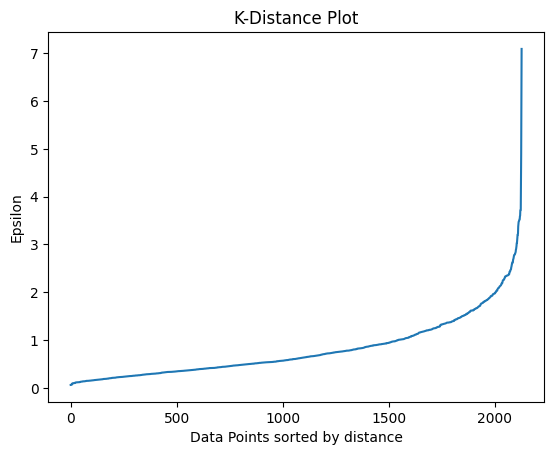

In [31]:
from sklearn.neighbors import NearestNeighbors

# Finding the optimal eps value using a K-Distance Plot
neighbors = NearestNeighbors(n_neighbors=2)
neighbors_fit = neighbors.fit(scaled_features)
distances, indices = neighbors_fit.kneighbors(scaled_features)

# Sort distance values by ascending value
distances = np.sort(distances, axis=0)
distances = distances[:,1]

plt.plot(distances)
plt.title('K-Distance Plot')
plt.xlabel('Data Points sorted by distance')
plt.ylabel('Epsilon')
plt.show()


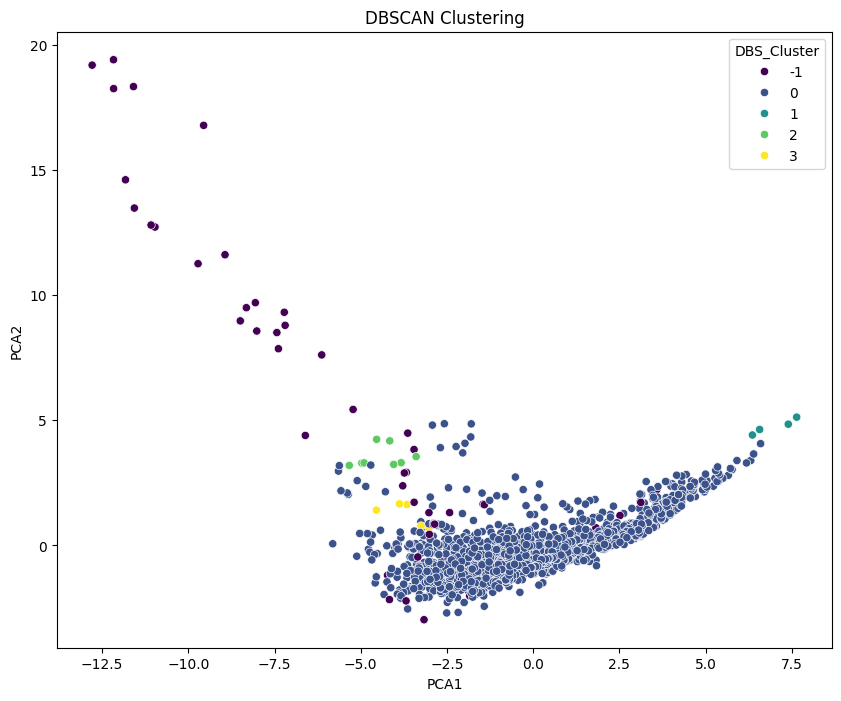

In [32]:
from sklearn.cluster import DBSCAN

# DBSCAN clustering
# had to try different values to get to eps value
dbscan = DBSCAN(eps=3.0, min_samples=5)
clusters = dbscan.fit_predict(scaled_features)

pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_features)
data_with_pca['PCA1'] = pca_result[:, 0]
data_with_pca['PCA2'] = pca_result[:, 1]

# Add the cluster labels to the original data
data_with_pca['DBS_Cluster'] = clusters

plt.figure(figsize=(10, 8))
sns.scatterplot(x='PCA1', y='PCA2', hue='DBS_Cluster', data=data_with_pca, palette='viridis')
plt.title('DBSCAN Clustering')
plt.show()


             Life expectancy  Adult Mortality  infant deaths    Alcohol  \
DBS_Cluster                                                               
-1                 62.067925       204.056604     538.811321   4.492277   
 0                 68.332021       172.988338      20.541788   4.414947   
 1                 82.775000        53.250000       0.000000  11.292500   
 2                 53.362500       376.625000     522.000000   9.049583   
 3                 65.280000       172.000000     278.600000   0.018000   

             percentage expenditure  Hepatitis B       Measles        BMI  \
DBS_Cluster                                                                 
-1                       427.302997    43.710112  36166.301887  25.667925   
 0                       617.535535    78.235891   1778.712342  37.128669   
 1                     16940.197725    94.250000      1.750000  32.850000   
 2                        95.050772    44.875000   7594.125000  19.850000   
 3          

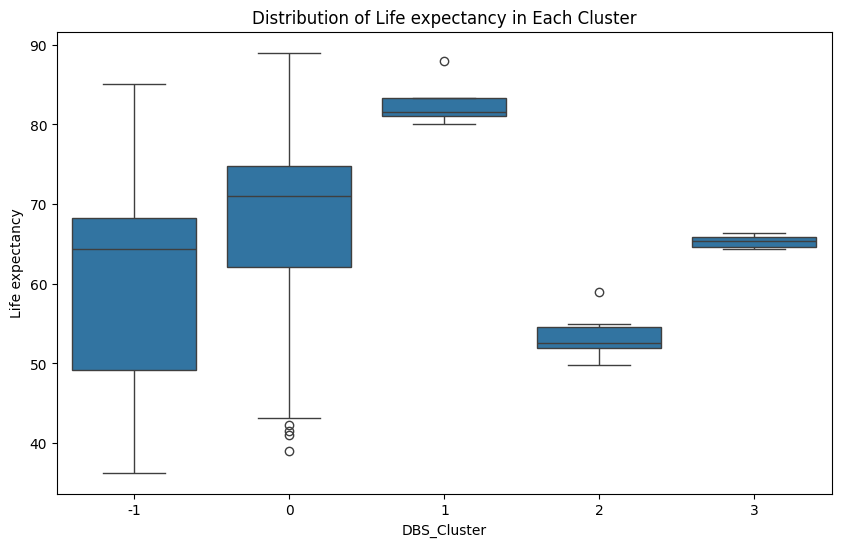

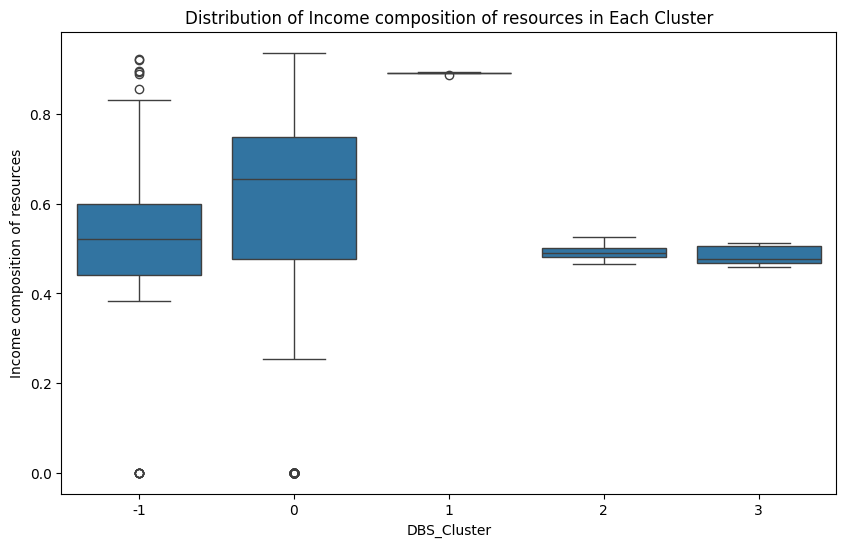

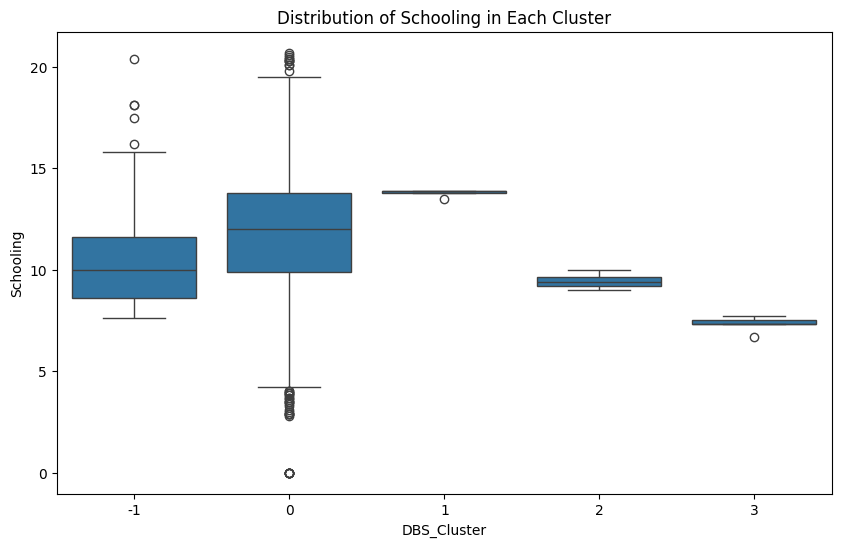

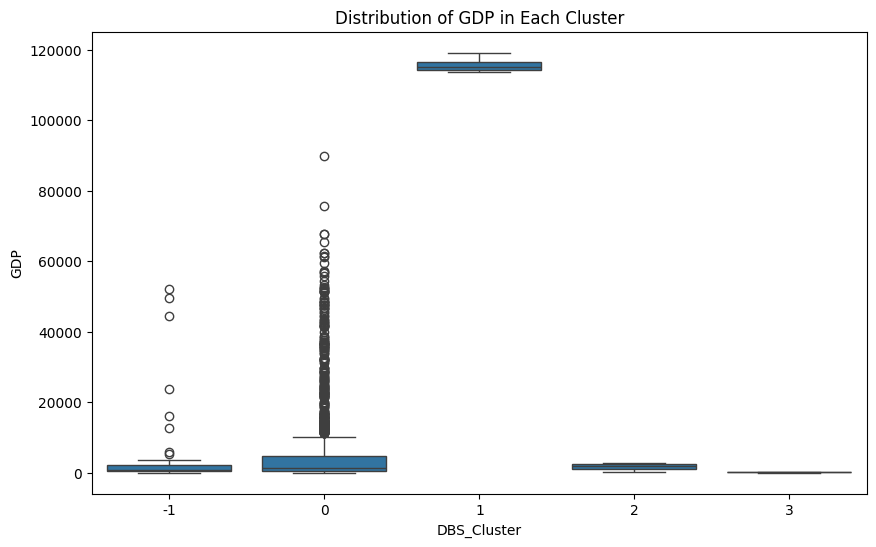

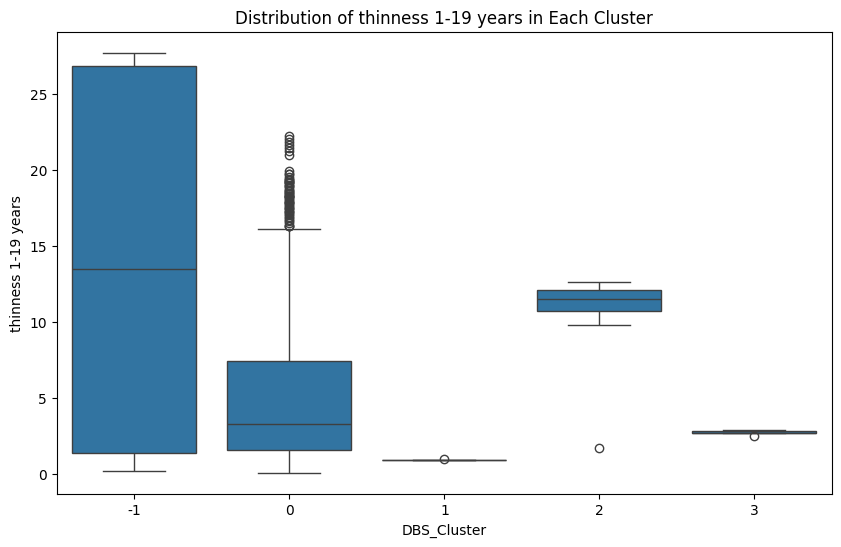

In [33]:
# Profile each cluster
numeric_cols = data_with_pca.select_dtypes(include=[np.number]).columns
cluster_profiles = data_with_pca.groupby('DBS_Cluster')[numeric_cols].mean()
print(cluster_profiles)

# Visualize cluster characteristics
for col in ['Life expectancy','Income composition of resources','Schooling','GDP','thinness 1-19 years']:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='DBS_Cluster', y=col, data=data_with_pca)
    plt.title(f'Distribution of {col} in Each Cluster')
    plt.show()

## GaussianMixture

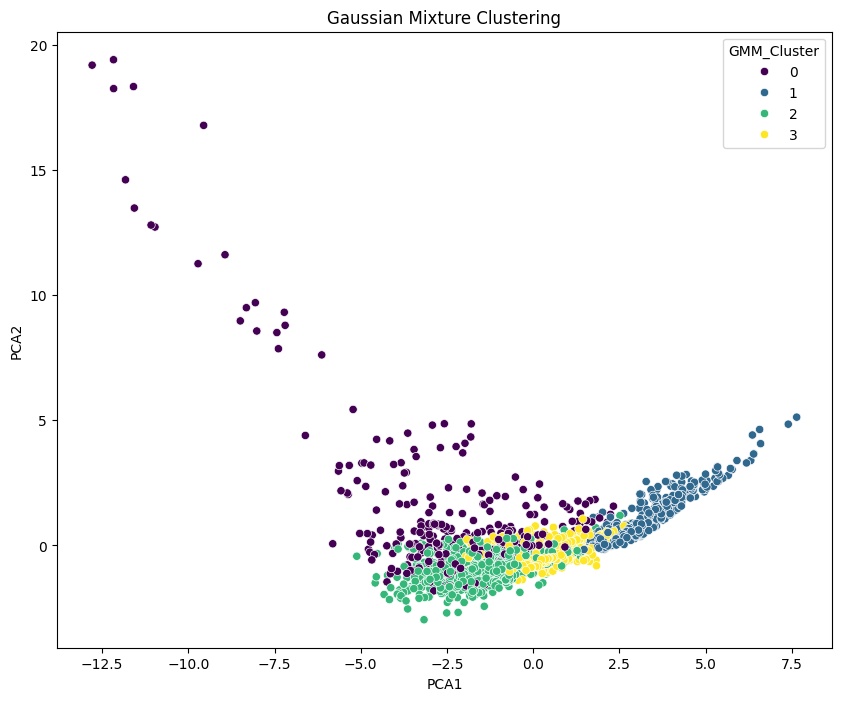

In [34]:
from sklearn.mixture import GaussianMixture

# Applying Gaussian Mixture Model
gmm = GaussianMixture(n_components=4)
gmm_clusters = gmm.fit_predict(scaled_features)

# Add the cluster labels to your original data
data_with_pca['GMM_Cluster'] = gmm_clusters

# Visualizing the clusters (using PCA for a 2D representation)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_features)
data_with_pca['PCA1'] = pca_result[:, 0]
data_with_pca['PCA2'] = pca_result[:, 1]

plt.figure(figsize=(10, 8))
sns.scatterplot(x='PCA1', y='PCA2', hue='GMM_Cluster', data=data_with_pca, palette='viridis')
plt.title('Gaussian Mixture Clustering')
plt.show()

             Life expectancy  Adult Mortality  infant deaths   Alcohol  \
GMM_Cluster                                                              
0                  62.485668       210.947883     187.625407  3.068769   
1                  78.245859        89.480808       0.820202  8.991258   
2                  61.106676       242.565395      19.434605  2.972311   
3                  71.341554       141.577703       6.974662  3.154134   

             percentage expenditure  Hepatitis B       Measles        BMI  \
GMM_Cluster                                                                 
0                        120.945244    66.410778  16584.495114  23.167752   
1                       2122.730457    82.567965    323.676768  52.691111   
2                        155.628586    66.461595    355.542234  27.937875   
3                        270.202851    91.879869    240.645270  41.181588   

             Under-5 Deaths      Polio  ...    Population  \
GMM_Cluster                    

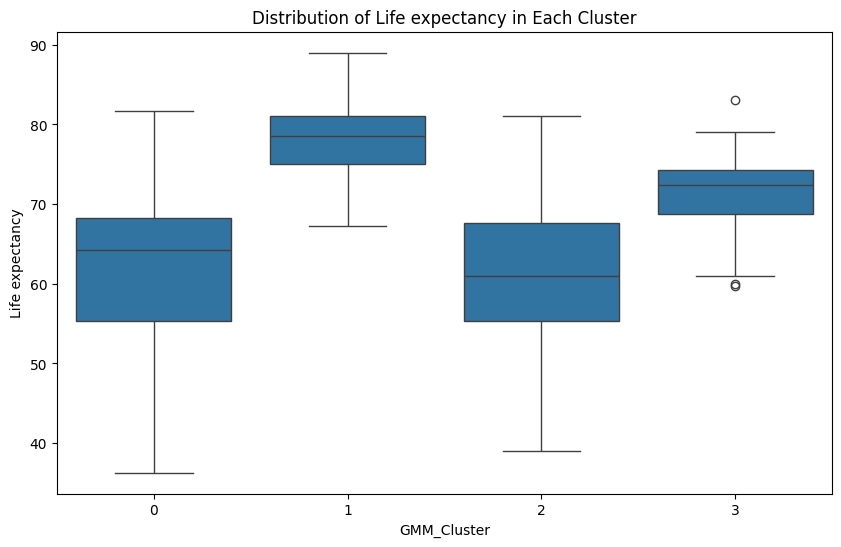

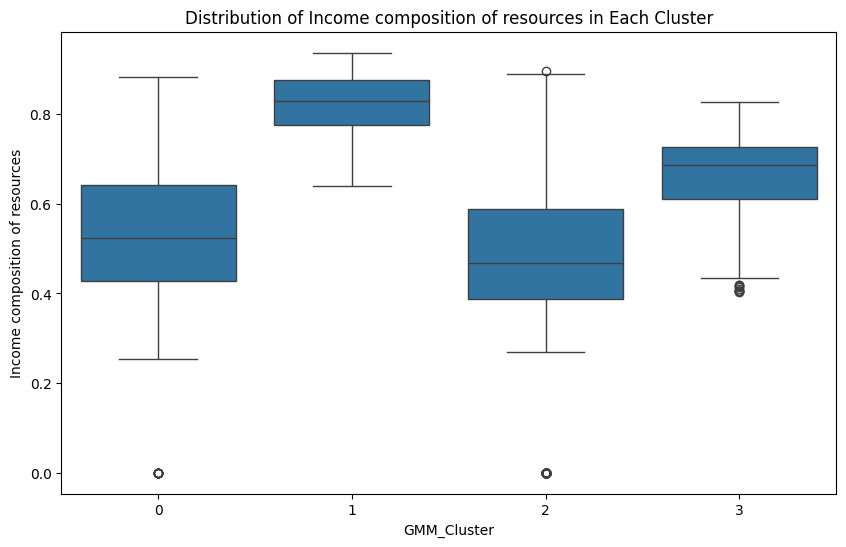

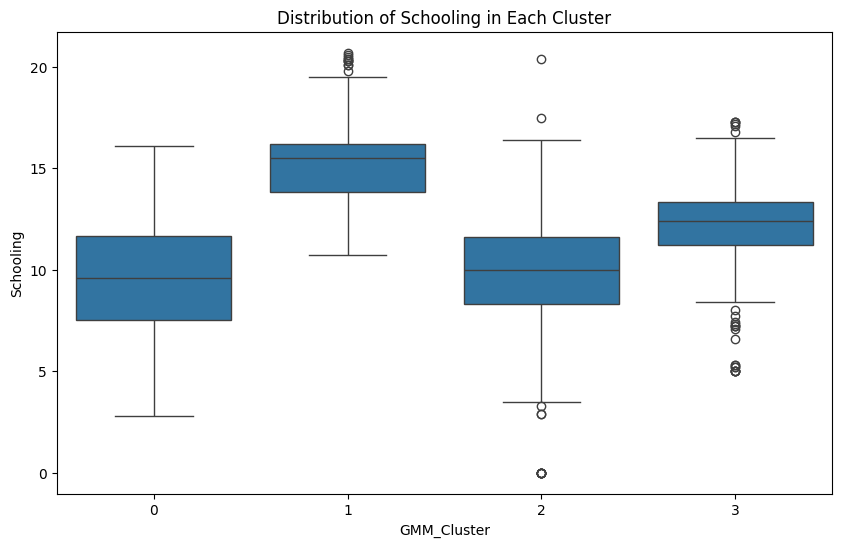

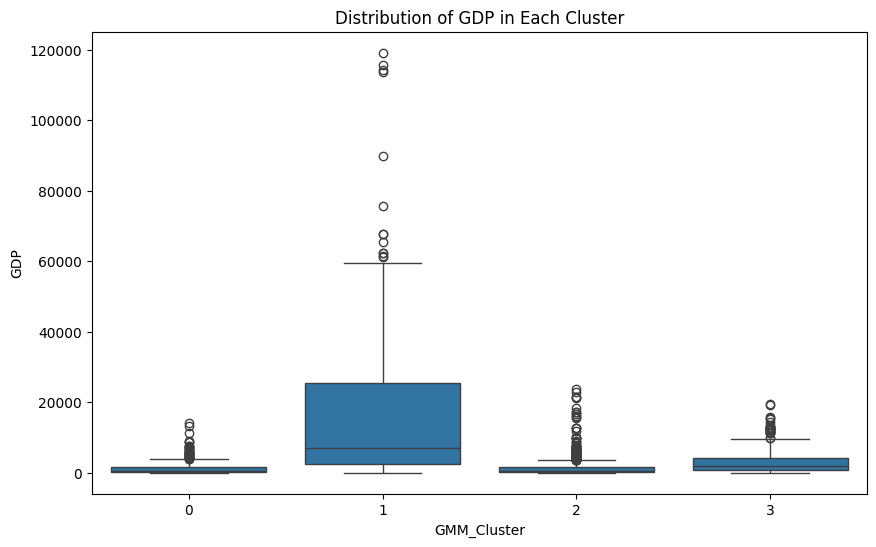

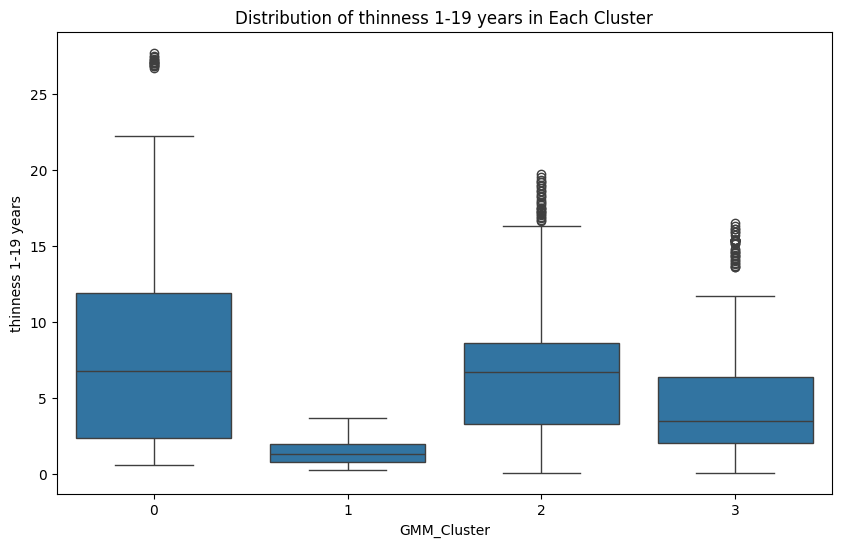

In [35]:
# Profile each cluster
numeric_cols = data_with_pca.select_dtypes(include=[np.number]).columns
cluster_profiles = data_with_pca.groupby('GMM_Cluster')[numeric_cols].mean()
print(cluster_profiles)

# Visualize cluster characteristics
for col in ['Life expectancy','Income composition of resources','Schooling','GDP','thinness 1-19 years']:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='GMM_Cluster', y=col, data=data_with_pca)
    plt.title(f'Distribution of {col} in Each Cluster')
    plt.show()

# Results Summary and Conclusion

## Feature and Model Summary

We checked our initial ideas about what affects life expectancy—and they were right:

**Resources**: Countries with more resources tend to have longer lifespans.

**Health spending**: Nations that spend a bigger share of their GDP on health care also live longer.

**Education**: Better schooling usually goes hand-in-hand with higher life expectancy.

**Nutrition**: Poor nutrition lowers life expectancy.

**Infant mortality**: Higher rates of infant deaths pull down the average life expectancy.





### Model Evaluation

* The **KNN** clustering model gave the clearest groups when we tried to sort countries by life expectancy.
* We used silhouette scores and elbow method to arrive at optimal number of clusters
* Model was able to pick better boundaries for clustering. The final clusters lined up well with what we expected from the key features above.


## Key Takeaways for Stakeholders

Based on what we saw from feature analysis and model results, we are able to provide following guidelines for stake holders:

* **Nutrition**

Make children's nutrition a top priority—good early-life feeding has a big, lasting impact on how long people live.

* **Education**

Investing in schooling pays off in health. Even countries with similar budgets see longer lifespans when they focus on education.

* **Early Health Spending**

Spending on children's health early isn't just a cost—it leads to better health and bigger economic gains down the road.



